In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation 



ModuleNotFoundError: No module named 'data_process'

In [60]:
## Path and parse

paths = {}
files = {}
data_sets = {}
tmp = []
f =open('Path_and_File.txt','r')
string = f.read()
list_1 = string.split('##')


[tmp.append(x.split('=')[0].rstrip()) for x in list_1[1].split('#')[1:]]
[paths.update({i : []} )for i in tmp]
[paths[x.split('=')[0].rstrip()].append(x.split('= ')[1].rstrip()) for x in list_1[1].split('#')[1:]]
tmp=[]
[tmp.append(x.split('=')[0].rstrip()) for x in list_1[2].split('#')[1:]]
[files.update({i : []} )for i in tmp]
[files[x.split('=')[0].rstrip()].append(x.split('= ')[1].rstrip()) for x in list_1[2].split('#')[1:]]
tmp = []
[tmp.append(x.split('=')[0].rstrip()) for x in list_1[3].split('#')[1:]]
[data_sets.update({i : []} )for i in tmp]
[data_sets[x.split('=')[0].rstrip()].append(x.split('= ')[1].rstrip()) for x in list_1[3].split('#')[1:]]
f.close()


In [61]:
#plot scatter
path_label = '/mnt/SSD1/data/cluster_label/LD50_tmp/'
path_unsuper = '/mnt/SSD1/data/cluster/LD50/'
list_df_label = []
list_df_unsuper = []

for i in os.listdir(path_label):
    list_df_label.append(pd.read_csv(os.path.join(path_label,i)))
for i in os.listdir(path_unsuper):
    list_df_unsuper.append(pd.read_csv(os.path.join(path_unsuper,i)))

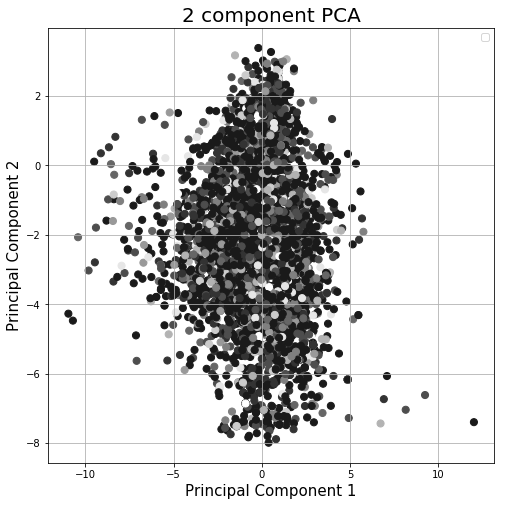

In [77]:
# epoch_label = list_df_label[499]

epoch_label = list_df_label
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

colors = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

ax.legend(targets)
ax.grid()
wframe = None
i = 141
colors_list = [colors[x] for x in epoch_label[i]['label']]
oldcol = wframe
wframe = ax.scatter(epoch_label[i][ 'Node0']
           , epoch_label[i]['Node1']
           , c = colors_list
           , s = 50)



    

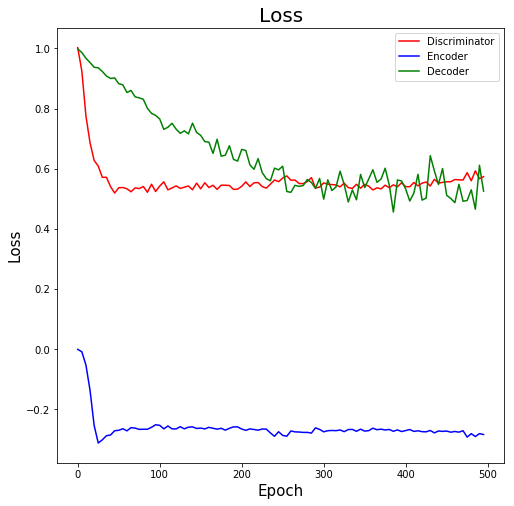

In [74]:
path_labeld_train_data = '/mnt/SSD1/data/LD50/LD50_training_labeld_data/'
path_unsuper_train_data = '/mnt/SSD1/data/LD50/LD50_training_data/'

data_set = 'LD50'
file_name = file_name = files['Training data file name'][0] + data_set
f_l = open(os.path.join(path_labeld_train_data, file_name),'r')

epoch = []
disLoss = []
encLoss = []
decLoss = []

string_labeld_data = f_l.read()
list_labeld_data = string_labeld_data.split('\n')

l = [np.float_(i.split(';')) for i in list_labeld_data[0:100]]
l = np.array(l)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Epoch', fontsize = 15)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_title('Loss', fontsize = 20)
ax.plot(l[:,0],l[:,1], c='r')
ax.plot(l[:,0],l[:,2], c= 'b')
ax.plot(l[:,0],l[:,3], c='g')
ax.legend(['Discriminator', 'Encoder', 'Decoder'])
